<a href="https://colab.research.google.com/github/cristina-ramos/INFO/blob/main/Assignments/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
excel = pd.read_csv(r'/content/multipleChoiceResponses.csv',low_memory=False)
median = []
gender = []
excel = excel[excel['Q1']!='Prefer to self-describe']
excel = excel[excel['Q1']!='Prefer not to say']
excel = excel[excel['Q9']!='What is your current yearly compensation (approximate $USD)?']
excel = excel[excel['Q9'].notnull()]
excel = excel[excel['Q9']!= 'I do not wish to disclose my approximate yearly compensation']
order = {'Male': 'Male', 'Female': 'Female'}
dic = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000, '40-50,000': 45000, '50-60,000': 55000, 
       '60-70,000': 65000, '70-80,000': 75000, '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500, '125-150,000': 137500,
       '150-200,000': 175000, '200-250,000': 225000, '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000, '500,000+' : 500000}
excel['gender']= excel['Q1'].apply(lambda x:order[x])
excel['median']= excel['Q9'].apply(lambda x: dic[x])
Female = excel[excel["gender"] == "Female"]
Male = excel[excel["gender"] == "Male"]
print("Female median value is:")
print(statistics.median(Female["median"]))
print("Male median value is:")
print(statistics.median(Male["median"]))

Female median value is:
25000.0
Male median value is:
35000.0


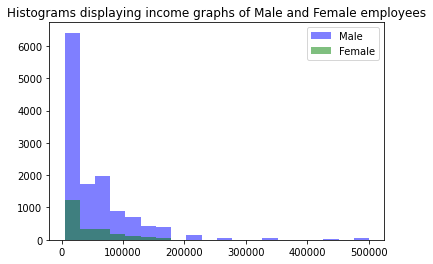

In [ ]:
data = {'gender':excel['gender'],'median':excel['median']}
FeMaSa = pd.DataFrame(data)
FeMaSa.to_csv("gender_salaries.csv", index=False)

plt.hist(excel[excel['gender']=='Male']['median'], bins=20, alpha=0.5, color='blue', label='Male')
plt.hist(excel[excel['gender']=='Female']['median'], bins=20, alpha=0.5, color='green', label='Female')
plt.title('Histograms displaying income graphs of Male and Female employees')
plt.legend()
plt.show()

In [ ]:
b=pd.notnull(excel['Q9'])
c = excel[b]
cleaning = c[(c.Q1 != 'Prefer not to say') & (c.Q1 != 'Prefer to self-describe') & (c.Q9 != 'I do not wish to disclose my approximate yearly compensation')]
clean_data = cleaning[['Q1', 'Q9']][1:]
split = clean_data['Q9'].str.split('-').str[1]
first = split.str.split(',').str[0]
second = split.str.split(',').str[1]
clean_data['data']= first+second
m_index = clean_data[clean_data['Q1']=='Male'].index
m_samples = np.random.choice(m_index, 250, replace=False)
male = clean_data.loc[m_samples]
f_index = clean_data[clean_data['Q1']=='Female'].index
f_samples = np.random.choice(f_index, 250, replace=False)
female = clean_data.loc[f_samples]
final_samples = pd.concat([male, female], axis=0)
final_samples

,Q1,Q9,data
2518,Male,"10-20,000",20000
15734,Male,"125-150,000",150000
429,Male,"20-30,000",30000
13034,Male,"10-20,000",20000
6568,Male,"100-125,000",125000
...,...,...,...
18096,Female,"0-10,000",10000
20664,Female,"20-30,000",30000
14649,Female,"0-10,000",10000
22041,Female,"40-50,000",50000


No handles with labels found to put in legend.


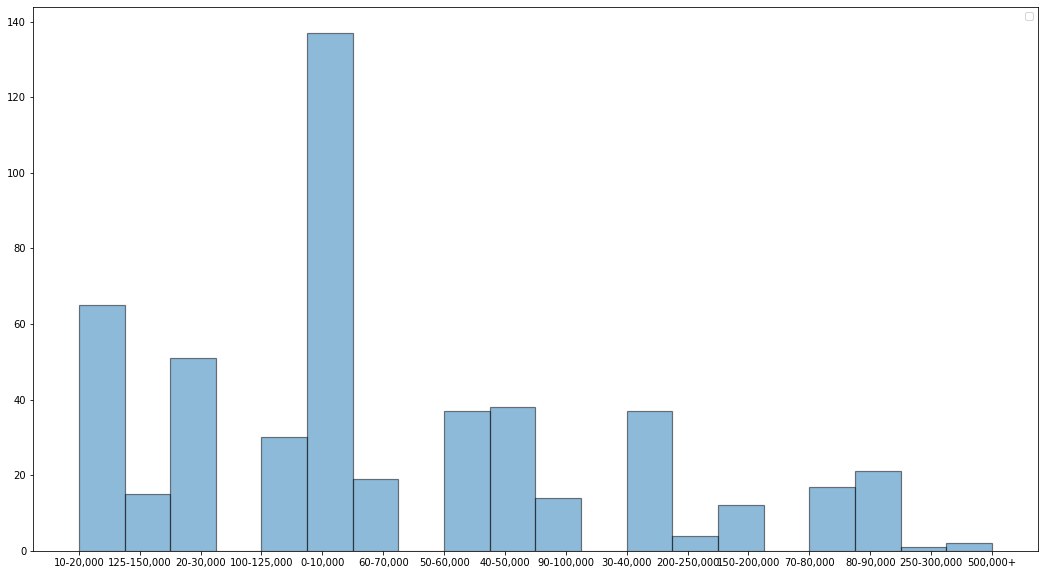

In [ ]:
plt.figure(figsize=(18,10))
plt.hist(final_samples['Q9'],bins=20,alpha=0.5,edgecolor='black', linewidth=1.2)

plt.legend()

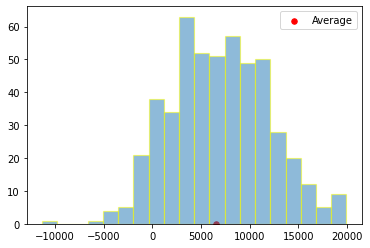

In [ ]:
mf_random = []
clean_data['Avg_salary'] = clean_data['Q9'].apply(lambda value: dic[value])
for temp in range(500):
  m_index = clean_data[clean_data['Q1']=='Male'].index
  m_samples = np.random.choice(m_index, 250, replace=False)
  male = clean_data.loc[m_samples]
  male_data = male['Avg_salary'].mean()
  f_index = clean_data[clean_data['Q1']=='Female'].index
  f_samples = np.random.choice(f_index, 250, replace=False)
  female = clean_data.loc[f_samples]
  female_data = female['Avg_salary'].mean()
  mf_random.append(male_data-female_data)

male_female = clean_data.groupby('Q1')
male_avg = male_female.get_group('Male')['Avg_salary'].mean()
female_avg = male_female.get_group('Female')['Avg_salary'].mean()
avg_diff = male_avg - female_avg
plt.hist(mf_random,bins=20, alpha=0.5,edgecolor='yellow',linewidth=1.2)
plt.scatter(avg_diff,0,color='red',s=30,label='Average')
plt.legend()